In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import yfinance as yf

In [ ]:
# Download stock data
ticker = 'ANGELONE.NS'
stock_data = yf.download(ticker)
stock_data.to_csv('/content/stock_data.csv')

# Load data
data = pd.read_csv('/content/stock_data.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
values = data['Close'].values.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X,y = create_sequences(scaled_values, seq_length)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
X_test=X[-30:]
y_test=y[-30:]

In [ ]:
X_train=X
y_train=y

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history=model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
835/835 [==============================] - 35s 36ms/step - loss: 0.0029
Epoch 2/10
835/835 [==============================] - 30s 36ms/step - loss: 0.0013
Epoch 3/10
835/835 [==============================] - 30s 36ms/step - loss: 0.0013
Epoch 4/10
835/835 [==============================] - 29s 35ms/step - loss: 9.1466e-04
Epoch 5/10
835/835 [==============================] - 29s 35ms/step - loss: 8.4301e-04
Epoch 6/10
835/835 [==============================] - 30s 35ms/step - loss: 6.4125e-04
Epoch 7/10
835/835 [==============================] - 29s 35ms/step - loss: 5.4520e-04
Epoch 8/10
835/835 [==============================] - 31s 37ms/step - loss: 6.5054e-04
Epoch 9/10
835/835 [==============================] - 30s 35ms/step - loss: 6.1563e-04
Epoch 10/10
835/835 [==============================] - 29s 35ms/step - loss: 4.8713e-04


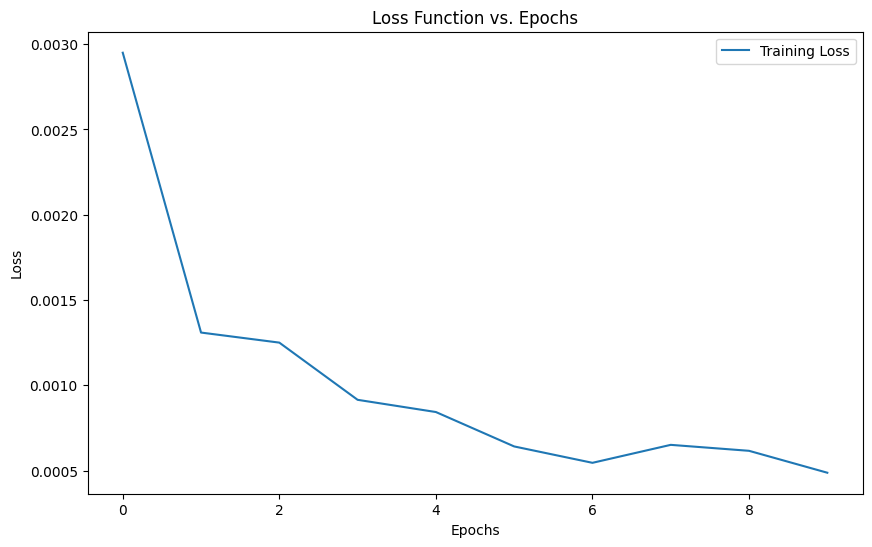

In [ ]:
# Plot of Loss Functions against the Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

train = data[:len(X_train) + seq_length]
valid = data[len(X_train) + seq_length:]
valid['Predictions'] = predictions


# Comparing the Actual and Predicted Data
valid['Predictions'].compare(data['Close'].tail(30))

1/1 [==============================] - 1s 917ms/step


<ipython-input-9-352602fe7e40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,self,other
Date,,
2024-05-21,2804.672852,2657.000000
2024-05-22,2689.287598,2606.100098
2024-05-23,2644.999023,2617.600098
2024-05-24,2664.796875,2599.550049
2024-05-27,2642.526367,2582.750000
2024-05-28,2627.373047,2537.750000
2024-05-29,2578.809570,2492.500000
2024-05-30,2534.886230,2474.199951
2024-05-31,2521.626953,2467.300049


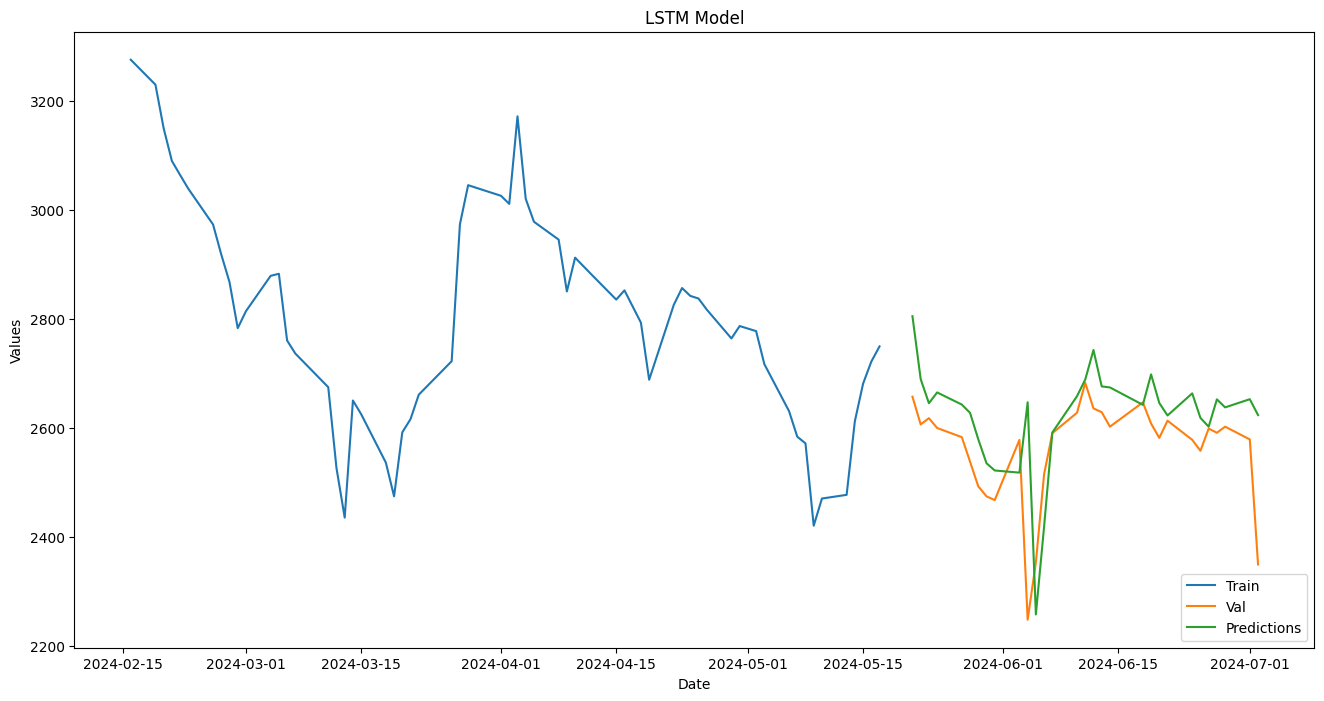

In [ ]:
# Visualize the predictions
plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Values')
plt.plot(train.tail(60)['Close'])
plt.plot(valid.tail(60)[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()